In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Import CSV


In [2]:
#import csv
used_car_df=pd.read_csv("vehicles.csv")

In [3]:
#set the used car data from to df for easof use
df=used_car_df


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


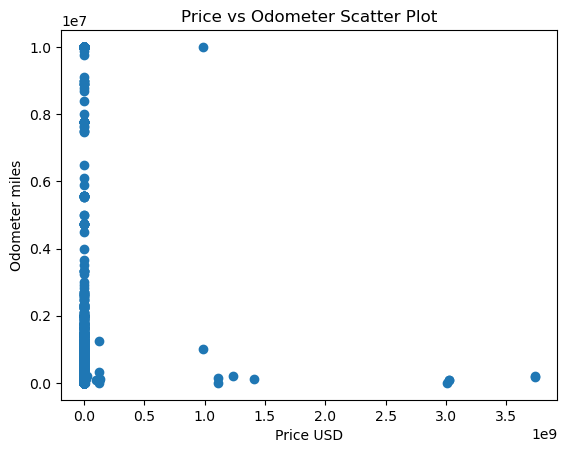

In [6]:
#scatterplot price and ocommeter to check of relationship and outliers
plt.scatter(df['price'], df['odometer'])
plt.xlabel("Price USD")  
plt.ylabel("Odometer miles")  
plt.title("Price vs Odometer Scatter Plot")  
plt.show()  

{'whiskers': [<matplotlib.lines.Line2D at 0x15448c250>,
 'caps': [<matplotlib.lines.Line2D at 0x15449b090>,
 'boxes': [<matplotlib.lines.Line2D at 0x15448fc50>],
 'medians': [<matplotlib.lines.Line2D at 0x154498ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15447d890>],
 'means': []}

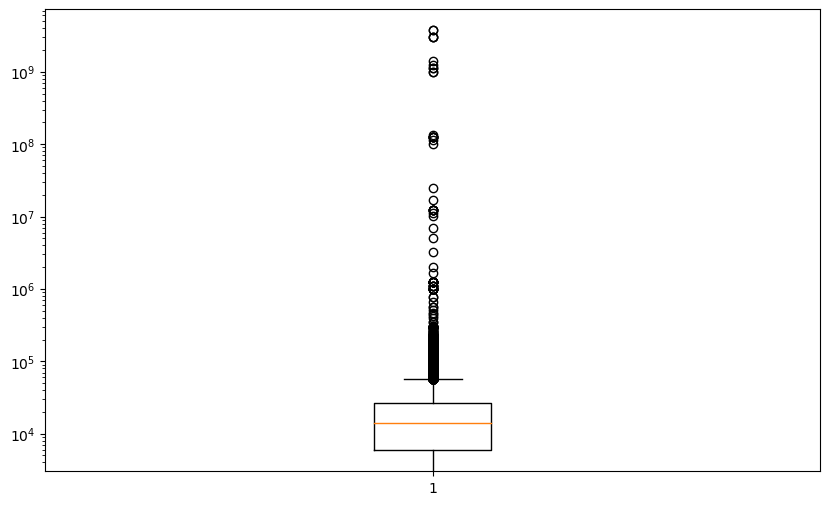

In [7]:
#box plot to check for outliers
plt.figure(figsize=(10, 6))  
plt.yscale('log')  
plt.boxplot(df['price'])

In [8]:
#remove outliers the first and third quartile
def filter_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_filtered = df.copy()
    
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        df_filtered = df_filtered.drop(outliers.index, errors='ignore')
    
    return df_filtered

In [8]:
df=filter_outliers(df)

NameError: name 'filter_outliers' is not defined

In [ ]:
#check fo outliers
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(df['price'])

In [ ]:
#check distribustion of price
plt.hist(df['price'], bins=10)

In [ ]:
#check distribution of odometer
plt.hist(df['odometer'], bins=10)

In [ ]:
#group number of vechicles by age
df['age'] =2024-df['year'] #create column for age
bins = [0,5,10,15,20,25, 30] #creae 6 age bins, used .describe above to understand oldest car/oldest bin 
labels = ['0-5','6-10', '11-15', '16-20','21-25', '26-30'] #relabel bins for interpretability
df['age_group']= pd.cut(df['age'], bins=bins, labels=labels, right=False) #create column to hold the "age group"
car_counts = df['age_group'].value_counts().sort_index()  #count the number of cars in each age group

#plot number of cars by age group
plt.figure(figsize=(10, 6))
car_counts.plot(kind='bar', color='lightblue')  
plt.xlabel('Age Group')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Age Group')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='-', alpha=0.7) 
plt.show()


In [ ]:
print(car_counts)

In [ ]:
#repeat for odometer reading
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 1000000]
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-1000']
df['odometer_group'] = pd.cut(df['odometer'], bins=bins, labels=labels, right=False)
odometer_counts = df['odometer_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
odometer_counts.plot(kind='bar', color='skyblue')  
plt.xlabel('Odometer Group (1000k)')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Odometer Group')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='-', alpha=0.7)  
plt.show()



In [ ]:
#find the mean odometer reading for each age group and plot
average_odometer = df.groupby('age_group').agg({'odometer': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_odometer['age_group'], average_odometer['odometer'], color='blue')
plt.xlabel('Age Group')
plt.ylabel('Average Odometer Reading')
plt.title('Average Odometer Readings by Vehicle Age Group')
plt.xticks(rotation=45) 

In [ ]:
#find the average price for each age group and plot
average_age = df.groupby('age_group').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_age['age_group'], average_age['price'], color='red')
plt.xlabel('Age Group')
plt.ylabel('Average Price')
plt.title('Average Price by Vehicle Age Group')
plt.xticks(rotation=45)  # Helps in making age group labels more readable
plt.show()


In [ ]:
#find the average price for each odometer group and plot
bins = [0,25000,50000,75000,100000,125000,150000,1000000] 
labels = ['0-25000','25-50000', '50-75000', '75-100000','10-125000', '125-150000', '150k-1000000']
df['milage_range']= pd.cut(df['odometer'], bins=bins, labels=labels, right=False)

average_odometer = df.groupby('milage_range').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_odometer['milage_range'], average_odometer['price'], color='blue')
plt.xlabel('Odometer Group')
plt.ylabel('Average Price')
plt.title('Average Odometer Readings by Vehicle Age Group')
plt.xticks(rotation=45) 

In [ ]:
#Plot the average price and odometer reading by age group
bins = [0, 5, 10, 15, 20, 25, 30, 35] 
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

average_data = df.groupby('age_group').agg({'price': 'mean', 'odometer': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Price', color='red')
ax1.bar(average_data['age_group'], average_data['price'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Odometer Reading', color='blue')  
ax2.plot(average_data['age_group'], average_data['odometer'], color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Price and Odometer Readings by Age Group')
plt.show()



In [ ]:
#plot the average price and average age by odometer group
bins = [0,25000,50000,75000,100000,125000,150000,1000000] 
labels = ['0-25000','25-50000', '50-75000', '75-100000','10-125000', '125-150000', '150k-1000000']
df['milage_range']= pd.cut(df['odometer'], bins=bins, labels=labels, right=False)
car_counts = df['milage_range'].value_counts().sort_index()  

average_data = df.groupby('milage_range').agg({'age': 'mean', 'price': 'mean'}).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Milage Range')
ax1.set_ylabel('Average Price', color="red")
ax1.bar(average_data['milage_range'], average_data['price'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Age',color='blue') 
ax2.plot(average_data['milage_range'], average_data['age'],color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Price and Age by Vehicle Milage Group')
plt.show()

In [ ]:
#plot the average odometer and age rance by price group
bins = [0, 10000, 20000, 30000, 50000, 75000]
labels = ['0-10000', '10-20000', '20-30000', '30-50000', '50-75000']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
price_counts = df['price_range'].value_counts().sort_index()

average_data = df.groupby('price_range').agg({'odometer': 'mean', 'age': 'mean'}).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Price Range')
ax1.set_ylabel('Average Odometer', color="red")
ax1.bar(average_data['price_range'], average_data['odometer'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Age Range',color='blue') 
ax2.plot(average_data['price_range'], average_data['age'],color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Odometer and Average Age by  Price Group')
plt.show()

In [ ]:
#count of cars by paint color
color_counts = df['paint_color'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='lightblue') 
plt.xlabel('Paint Color')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Paint Color')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [ ]:

price_by_color = df.groupby('paint_color')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 8))
price_by_color.plot(kind='bar', color='yellow')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.title('Average Price by Car Color')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [ ]:
count_by_color = color_counts.to_frame(name='count')

merged = price_by_color.to_frame().merge(color_counts, left_index=True, right_index=True)

# Sort the merged data by the count of cars so columns for count are in same order is average price by color
color_sorted = merged.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
color_sorted['price'].plot(kind='bar', color='yellow')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.title('Average Price by Car Color Sorted by Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [ ]:
print(df.columns)

In [ ]:
df.info()

In [ ]:
#create a list of all the VIN numbers
vin_list = df['VIN'].dropna().tolist()


In [ ]:
print(len(vin_list))

In [ ]:
#create frame to display the null values as a percentage of the total rows of the data frame. The missing value will display inorder of most missing values to least

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

# Filling Missing Values

In [10]:
vin_list=df

In [11]:
#the vin number contains information aboutthe vehicle. The VIN number can be decoded to give many of the features in this data set. There are many many other attributes the VIN number can describe.
#NHTSA has an API that can be called it can take a VIN number and return the atributes in key value pairs. 

import requests # requests allows for a http api call
from concurrent.futures import ThreadPoolExecutor, as_completed #concurrent allows for results to be , instead of one at a time. This cuts down on execution time
from tqdm import tqdm #tqdm displays a progress bar. Because of the number of vin numbers in this data set it will take hours to run. The progress bar gives a visual indication that the cell is still running normally
import pandas as pd
import time # this allows time to be added between retries

def decode_vin(vin, retries=3):# Vin is the VIN of interest and retries is the number of times the vin will be retried if there is an error
    url = f'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVin/{vin}?format=json' #api where "{vin}" is the VIN that will be ran through the API
    for attempt in range(retries):
        try:# the functtion will try a VIN number and return VIN details
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            data = response.json() #data is the json recieved from the API call
            results = data.get('Results', [])# results is the data in the json 
            vin_details = {item['Variable']: item['Value'] for item in results if item['Value']}#vin details is the key value pairs from the data
            return vin, vin_details
        except requests.HTTPError as e: # the above will happen EXCEPT if there is a 403 error
            if e.response.status_code == 403: #is a forbidden error 
                print(f"403 Forbidden for VIN {vin}. Retrying in {2 ** attempt} seconds...") #if the error occurs it will retry 3 times as set above. this will delay the retry eachtime so the API doesnt shutdown for over attempts
                time.sleep(2 ** attempt)  # Exponential backoff
            else:
                print(f"Error fetching VIN data for {vin}: {e}")# if after the 3 retries it will print this error
                return vin, None
        except requests.Timeout: #the try step will run EXCEPT whtn there is a timeout error.
            print(f"Timeout for VIN {vin}. Retrying in {2 ** attempt} seconds...")
            time.sleep(2 ** attempt)  # Exponential backoff
        except (requests.RequestException, ValueError) as e:
            print(f"Error fetching VIN data for {vin}: {e}")
            return vin, None
    return vin, None

def get_vin_details(vin_list, max_workers=10): #runs concerently with the API call with up to 10 threads reducing the processing time. The function takes the vin in the list created from the df above
    vin_data = []#adds completed vind to this list
    timeout_vins = []#adds time out VINs to this list
    error_vins = []#adds error vins to this list
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        tasks = [executor.submit(decode_vin, vin) for vin in vin_list]
        progress_bar = tqdm(total=len(vin_list), desc="Processing VINs", unit="VIN")
        
        for future in as_completed(tasks):
            vin, vin_details = future.result()#retrieves the Vins as the functions run
            progress_bar.update(1)
            if vin_details: #if details are added to this list in the above fuction this makes new key value pairs and adds it to the list vin_data
                vin_data.append({
                    "VIN": vin,
                    "Make": vin_details.get("Make"),
                    "Model": vin_details.get("Model"),
                    "Year": vin_details.get("Model Year"),
                    "Drive Type": vin_details.get("Drive Type"),
                    "Body Class": vin_details.get("Body Class"),
                    "Transmission Style": vin_details.get("Transmission Style"),
                    "Engine Number of Cylinders": vin_details.get("Engine Number of Cylinders"),
                    "Fuel Type - Primary": vin_details.get("Fuel Type - Primary")
                })
            else: #otherwise it adds it to the timeout list
                timeout_vins.append(vin)
                vin_data.append({
                    "VIN": vin,
                    "Make": None,
                    "Model": None,
                    "Year": None,
                    "Drive Type": None,
                    "Body Class": None,
                    "Transmission Style": None,
                    "Engine Number of Cylinders": None,
                    "Fuel Type - Primary": None
                })
        
        progress_bar.close()
    
    return vin_data, timeout_vins, error_vins


# Get VIN details
vin_data, timeout_vins, error_vins = get_vin_details(vin_list, max_workers=10)

# Convert to DataFrame
df = pd.DataFrame(vin_data)

# Save to CSV this ensures this step only needs to be ran once
df.to_csv('vehicledetailsv3.csv', index=False)

print("Processed VINs:")
for info in vin_data:
    print(info)

print("\nTimeout VINs:", timeout_vins)
print("Error VINs:", error_vins)


Processing VINs:   0%|                  | 26/426880 [00:03<14:39:27,  8.09VIN/s]


Processed VINs:
{'VIN': 'url', 'Make': None, 'Model': None, 'Year': None, 'Drive Type': None, 'Body Class': None, 'Transmission Style': None, 'Engine Number of Cylinders': None, 'Fuel Type - Primary': None}
{'VIN': 'condition', 'Make': None, 'Model': None, 'Year': None, 'Drive Type': None, 'Body Class': None, 'Transmission Style': None, 'Engine Number of Cylinders': None, 'Fuel Type - Primary': None}
{'VIN': 'id', 'Make': None, 'Model': None, 'Year': None, 'Drive Type': None, 'Body Class': None, 'Transmission Style': None, 'Engine Number of Cylinders': None, 'Fuel Type - Primary': None}
{'VIN': 'year', 'Make': None, 'Model': None, 'Year': None, 'Drive Type': None, 'Body Class': None, 'Transmission Style': None, 'Engine Number of Cylinders': None, 'Fuel Type - Primary': None}
{'VIN': 'region_url', 'Make': None, 'Model': None, 'Year': None, 'Drive Type': None, 'Body Class': None, 'Transmission Style': None, 'Engine Number of Cylinders': None, 'Fuel Type - Primary': None}
{'VIN': 'model',

In [12]:
#read back in the key csv that was downloaded when the above step completed
vin_data=pd.read_csv("vehicledetailsv3.csv")

In [13]:
vin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VIN                         26 non-null     object 
 1   Make                        0 non-null      float64
 2   Model                       0 non-null      float64
 3   Year                        0 non-null      float64
 4   Drive Type                  0 non-null      float64
 5   Body Class                  0 non-null      float64
 6   Transmission Style          0 non-null      float64
 7   Engine Number of Cylinders  0 non-null      float64
 8   Fuel Type - Primary         0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


In [14]:
vin_data.head()

,VIN,Make,Model,Year,Drive Type,Body Class,Transmission Style,Engine Number of Cylinders,Fuel Type - Primary
0,url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,region_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#setting the orginal df to a new variable incase any mistakes are made it can be "reset" here without needing to read the csv
car_data=df

In [17]:
#reset the vin_data column names to match the car_data df
vin_data.columns=['VIN','manufacturer','model','year','drive','type','transmission','cylinders','fuel']

In [18]:
car_data.tail()

,VIN,Make,Model,Year,Drive Type,Body Class,Transmission Style,Engine Number of Cylinders,Fuel Type - Primary
21,lat,None,None,None,None,None,None,None,None
22,county,None,None,None,None,None,None,None,None
23,long,None,None,None,None,None,None,None,None
24,description,None,None,None,None,None,None,None,None
25,posting_date,None,None,None,None,None,None,None,None


In [19]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   VIN                         26 non-null     object
 1   Make                        0 non-null      object
 2   Model                       0 non-null      object
 3   Year                        0 non-null      object
 4   Drive Type                  0 non-null      object
 5   Body Class                  0 non-null      object
 6   Transmission Style          0 non-null      object
 7   Engine Number of Cylinders  0 non-null      object
 8   Fuel Type - Primary         0 non-null      object
dtypes: object(9)
memory usage: 2.0+ KB


In [20]:
#rename dfs so its easier to "reset"
vin_data1=vin_data
car_data1=car_data

In [21]:
#rename the columns to match the full data set
vin_data1.columns=['VIN','manufacturer','model','year','drive','type','transmission','cylinders','fuel']

In [22]:
car_data1.columns

Index(['VIN', 'Make', 'Model', 'Year', 'Drive Type', 'Body Class',
       'Transmission Style', 'Engine Number of Cylinders',
       'Fuel Type - Primary'],
      dtype='object')

In [23]:
#merging the two data frames on the column "VIN"
merged_df = car_data1.merge(vin_data1, on='VIN', suffixes=('', '_subset'))

print("\nMerged DataFrame columns:")
print(merged_df.columns)

# Fill missing values in car_data1 with corresponding values from car_data2
for column in vin_data1.columns:
    if column != 'VIN':
        subset_column = f"{column}_subset"
        if subset_column in merged_df.columns:
            car_data1[column] = car_data1[column].fillna(merged_df[subset_column])
        else:
            print(f"Column {subset_column} not found in merged_df")



Merged DataFrame columns:
Index(['VIN', 'Make', 'Model', 'Year', 'Drive Type', 'Body Class',
       'Transmission Style', 'Engine Number of Cylinders',
       'Fuel Type - Primary', 'manufacturer', 'model', 'year', 'drive', 'type',
       'transmission', 'cylinders', 'fuel'],
      dtype='object')
Column manufacturer_subset not found in merged_df
Column model_subset not found in merged_df
Column year_subset not found in merged_df
Column drive_subset not found in merged_df
Column type_subset not found in merged_df
Column transmission_subset not found in merged_df
Column cylinders_subset not found in merged_df
Column fuel_subset not found in merged_df


In [24]:
#check the missing values this reduced the missing values for all of the features with realiable data
percent_missing = car_data1.isnull().sum() * 100 / len(car_data1)
missing_value_df = pd.DataFrame({'column_name': car_data1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
Make,Make,100.0
Model,Model,100.0
Year,Year,100.0
Drive Type,Drive Type,100.0
Body Class,Body Class,100.0
Transmission Style,Transmission Style,100.0
Engine Number of Cylinders,Engine Number of Cylinders,100.0
Fuel Type - Primary,Fuel Type - Primary,100.0
VIN,VIN,0.0


In [25]:
#check the values for transmission
car_data1['transmission'].value_counts()

KeyError: 'transmission'

In [26]:
#rename the the duplicated names
car_data1['transmission'] = car_data1['transmission'].replace('Manual/Standard', 'manual')
car_data1['transmission'] = car_data1['transmission'].replace('Automatic', 'automatic')


KeyError: 'transmission'

In [44]:
#check the values of transmission
car_data1['type'].value_counts()

type
sedan                                                      83753
SUV                                                        73972
Pickup                                                     67280
pickup                                                     39755
truck                                                      30551
other                                                      20831
coupe                                                      16271
hatchback                                                  16181
wagon                                                      10328
van                                                         7957
Convertible/Cabriolet                                       6631
convertible                                                 6025
Coupe                                                       5999
mini-van                                                    4641
Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)     1673
bus                 

In [45]:
#rename the duplicated names 
car_data1['type']=car_data1['type'].replace('Convertible/Cabriolet','convertible')
car_data1['type']=car_data1['type'].replace('Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)','SUV')
car_data1['type']=car_data1['type'].replace('Pickup','pickup')
car_data1['type']=car_data1['type'].replace('Coupe','coupe')
car_data1['type']=car_data1['type'].replace('truck','pickup')


In [46]:
car_data1[car_data1['type']=='other'].tail(100)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,county,state,lat,long,posting_date,age,age_group,odometer_group,milage_range,price_range
425400,7310131963,https://sheboygan.craigslist.org/ctd/d/ton-ser...,sheboygan,https://sheboygan.craigslist.org,0,2014.0,ram,Sierra,NaN,8.0,...,NaN,wi,NaN,NaN,2021-04-20T19:37:40-0500,10.0,11-15,0-25,0-25000,0-10000
425407,7309890285,https://sheboygan.craigslist.org/ctd/d/sheboyg...,sheboygan,https://sheboygan.craigslist.org,43990,2020.0,jaguar,e-pace p250 se sport,good,8.0,...,NaN,wi,43.700000,-87.740000,2021-04-20T12:11:10-0500,4.0,0-5,0-25,0-25000,30-50000
425461,7306670163,https://sheboygan.craigslist.org/ctd/d/sheboyg...,sheboygan,https://sheboygan.craigslist.org,49990,2018.0,bmw,x5 xdrive50i sport utility,good,8 cylinders,...,NaN,wi,43.700000,-87.740000,2021-04-14T10:11:14-0500,6.0,6-10,0-25,0-25000,30-50000
425462,7306625014,https://sheboygan.craigslist.org/ctd/d/sheboyg...,sheboygan,https://sheboygan.craigslist.org,41990,2018.0,bmw,x5 xdrive50i sport utility,good,8 cylinders,...,NaN,wi,43.700000,-87.740000,2021-04-14T08:50:59-0500,6.0,6-10,25-50,25-50000,30-50000
425481,7305113366,https://sheboygan.craigslist.org/ctd/d/sheboyg...,sheboygan,https://sheboygan.craigslist.org,39990,2020.0,acura,mdx sh-awd sport utility,good,6 cylinders,...,NaN,wi,43.700000,-87.740000,2021-04-11T08:51:22-0500,4.0,0-5,0-25,0-25000,30-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426858,7301953587,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,51990,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,...,NaN,wy,33.779214,-84.411811,2021-04-05T03:50:20-0600,4.0,0-5,0-25,0-25000,50-75000
426859,7301952155,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,...,NaN,wy,33.779214,-84.411811,2021-04-05T03:30:19-0600,4.0,0-5,0-25,0-25000,30-50000
426860,7301951544,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,...,NaN,wy,33.779214,-84.411811,2021-04-05T03:20:23-0600,7.0,6-10,25-50,25-50000,30-50000
426866,7301949190,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,...,NaN,wy,33.779214,-84.411811,2021-04-05T02:41:26-0600,8.0,6-10,50-75,50-75000,30-50000


In [47]:
#check values for drive
car_data1['drive'].value_counts()

drive
4wd                      121411
fwd                      102029
4x2                       64086
rwd                       49763
4WD/4-Wheel Drive/4x4     29579
RWD/Rear-Wheel Drive      11875
FWD/Front-Wheel Drive      1451
AWD/All-Wheel Drive          50
Name: count, dtype: int64

In [48]:
#investigate 4x2 to determine what it represents
car_data1[car_data1['drive']=='4x2'].head(1000)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,county,state,lat,long,posting_date,age,age_group,odometer_group,milage_range,price_range
18501,7314937040,https://fortsmith.craigslist.org/cto/d/van-bur...,fort smith,https://fortsmith.craigslist.org,8995,2011.0,ram,1500,NaN,8 cylinders,...,NaN,ar,35.454000,-94.327800,2021-04-30T13:35:58-0500,13.0,11-15,150-1000,150k-1000000,0-10000
18505,7314798771,https://fortsmith.craigslist.org/cto/d/mansfie...,fort smith,https://fortsmith.craigslist.org,11000,2013.0,ram,Silverado,good,8.0,...,NaN,ar,35.043200,-94.220400,2021-04-30T09:48:23-0500,11.0,11-15,150-1000,150k-1000000,10-20000
18510,7313908837,https://fortsmith.craigslist.org/cto/d/van-bur...,fort smith,https://fortsmith.craigslist.org,5200,2008.0,dodge,nitro,NaN,8.0,...,NaN,ar,35.454000,-94.327800,2021-04-28T12:19:36-0500,16.0,16-20,150-1000,150k-1000000,0-10000
18511,7313900804,https://fortsmith.craigslist.org/cto/d/van-bur...,fort smith,https://fortsmith.craigslist.org,5400,2012.0,dodge,grand caravan,NaN,8.0,...,NaN,ar,35.454000,-94.327800,2021-04-28T12:07:03-0500,12.0,11-15,150-1000,150k-1000000,0-10000
18512,7313899977,https://fortsmith.craigslist.org/cto/d/van-bur...,fort smith,https://fortsmith.craigslist.org,5200,2010.0,mazda,5,NaN,8.0,...,NaN,ar,35.454000,-94.327800,2021-04-28T12:05:50-0500,14.0,11-15,150-1000,150k-1000000,0-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21621,7314573831,https://bakersfield.craigslist.org/ctd/d/selma...,bakersfield,https://bakersfield.craigslist.org,36990,2012.0,ford,f-250 super duty,excellent,8.0,...,NaN,ca,36.533226,-119.576488,2021-04-29T15:47:32-0700,12.0,11-15,25-50,25-50000,30-50000
21624,7314573379,https://bakersfield.craigslist.org/ctd/d/selma...,bakersfield,https://bakersfield.craigslist.org,44990,2013.0,CHEVROLET,International 4300,excellent,8.0,...,NaN,ca,36.533226,-119.576488,2021-04-29T15:46:31-0700,11.0,11-15,50-75,50-75000,30-50000
21625,7314573190,https://bakersfield.craigslist.org/ctd/d/selma...,bakersfield,https://bakersfield.craigslist.org,44990,2019.0,mercedes-benz,sprinter cab chassis,excellent,8.0,...,NaN,ca,36.533226,-119.576488,2021-04-29T15:46:07-0700,5.0,6-10,0-25,0-25000,30-50000
21627,7314572845,https://bakersfield.craigslist.org/ctd/d/selma...,bakersfield,https://bakersfield.craigslist.org,31990,2012.0,CHEVROLET,International TerraStar,good,8.0,...,NaN,ca,36.533226,-119.576488,2021-04-29T15:45:25-0700,12.0,11-15,125-150,125-150000,30-50000


In [49]:
#remove duplicate types. 4x2 was named rwd after a visual inspection and a verification of nomenclature through an iternet search
car_data1['drive']=car_data1['drive'].replace('FWD/Front-Wheel Drive','fwd')
car_data1['drive']=car_data1['drive'].replace('RWD/Rear-Wheel Drive','rwd')
car_data1['drive']=car_data1['drive'].replace('4WD/4-Wheel Drive/4x4','4wd')
car_data1['drive']=car_data1['drive'].replace('AWD/All-Wheel Drive','4wd')
car_data1['drive']=car_data1['drive'].replace('4x2','rwd')
car_data1['drive']=car_data1['drive'].replace('automatic','fwd')
car_data1['drive']=car_data1['drive'].replace('manual','rwd')
car_data1['drive']=car_data1['drive'].replace('other','4wd')


In [50]:
#as above
car_data1['fuel'].value_counts()

fuel
gas                            330859
other                           29271
diesel                          23879
hybrid                           5027
Gasoline                         2686
electric                         1557
Flexible Fuel Vehicle (FFV)        50
Name: count, dtype: int64

In [51]:
car_data1[car_data1['fuel']=='other'].head(50)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,county,state,lat,long,posting_date,age,age_group,odometer_group,milage_range,price_range
40,7315756348,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2016.0,chevrolet,colorado crew cab z71,good,8.0,...,NaN,al,32.5900,-85.480,2021-05-02T10:21:33-0500,8.0,6-10,25-50,25-50000,30-50000
41,7315715960,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,8.0,...,NaN,al,32.5900,-85.480,2021-05-02T08:44:35-0500,10.0,11-15,0-25,0-25000,20-30000
43,7315275975,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,8.0,...,NaN,al,32.5900,-85.480,2021-05-01T09:21:37-0500,10.0,11-15,50-75,50-75000,30-50000
44,7315275942,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2019.0,ford,ranger supercrew xl pickup,good,8.0,...,NaN,al,32.5900,-85.480,2021-05-01T09:21:34-0500,5.0,6-10,0-25,0-25000,30-50000
48,7314854462,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30590,2016.0,toyota,tacoma double cab sr5,good,8.0,...,NaN,al,32.5900,-85.480,2021-04-30T11:21:17-0500,8.0,6-10,25-50,25-50000,30-50000
54,7314584291,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,31590,2019.0,cadillac,xt4 sport suv 4d,good,8.0,...,NaN,al,32.5900,-85.480,2021-04-29T18:11:08-0500,5.0,6-10,0-25,0-25000,30-50000
58,7313857701,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,25590,2015.0,gmc,sierra 1500 regular cab,good,6 cylinders,...,NaN,al,32.5900,-85.480,2021-04-28T11:01:06-0500,9.0,6-10,25-50,25-50000,20-30000
60,7313387888,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28590,2018.0,ram,1500 quad cab express pickup,good,6 cylinders,...,NaN,al,32.5900,-85.480,2021-04-27T11:51:04-0500,6.0,6-10,25-50,25-50000,20-30000
61,7313387902,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,24590,2013.0,gmc,sierra 1500 extended cab slt,good,8 cylinders,...,NaN,al,32.5900,-85.480,2021-04-27T11:51:05-0500,11.0,11-15,75-100,75-100000,20-30000
66,7312824400,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,32990,2019.0,chevrolet,silverado 1500 ld,good,8.0,...,NaN,al,32.5900,-85.480,2021-04-26T10:41:03-0500,5.0,6-10,0-25,0-25000,30-50000


In [52]:
car_data1['fuel']=car_data1['fuel'].replace('Gasoline','gas')
car_data1['fuel']=car_data1['fuel'].replace('Flexible Fuel Vehicle (FFV)','gas')


In [53]:
#change data frame name to make "reset" easier
df=car_data

In [54]:
#create a function that gets the unique values in each feature
def clean_unique_values(df, column_name):
    try:
        # Get unique values from the column
        unique_values = df[column_name].dropna().unique().tolist()
        
        # Clean the list (strip whitespace and convert to string)
        cleaned_values = [str(value).strip() for value in unique_values if pd.notnull(value)]
        
        # Remove duplicates using set and convert back to list
        unique_cleaned_values = list(set(cleaned_values))
        
        return unique_cleaned_values
    except KeyError:
        print(f"Column '{column_name}' not found in DataFrame.")
        return []

In [55]:
size = clean_unique_values(car_data1,"size")
paint_color = clean_unique_values(car_data1,"paint_color")
fuel = clean_unique_values(car_data1,"fuel")
drive = clean_unique_values(car_data1,"drive")
condition = clean_unique_values(car_data1,"condition")
manufacturer = clean_unique_values(car_data1,"manufacturer")
cylinders = clean_unique_values(car_data1,"cylinders")
condition = clean_unique_values(car_data1,"condition")
drive = clean_unique_values(car_data1,"drive")
transmission = drive = clean_unique_values(car_data1,"transmission")
# List of keywords lists and corresponding column names
keylists = [(size,"size"),(paint_color,"paint_color"),(fuel,"fuel"),(drive,"drive"),(condition,"condition"),(manufacturer,"manufacturer"),(cylinders,"cylinders"),(transmission,"transmission")]

In [56]:
#the descriptions are full of user written text describing the car
# Function to "read" the descriptions and search for the keywords listed above. The function extracts and fills keywords in the correct column and row
def fill_na_with_keywords(row, keylists):
    description = row['description']
    if pd.isna(description):
        return row
    for keywords, col in keylists:
        if pd.isna(row[col]):
            for keyword in keywords:
                if keyword in description.lower():
                    row[col] = keyword
                    break
    return row
# Apply the function to each row
df = df.apply(lambda row: fill_na_with_keywords(row, keylists), axis=1)
#the above function was specifically helpful for color which isnt a part of the VIN code as color can be changed


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393358 entries, 27 to 426879
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              393358 non-null  int64  
 1   url             393358 non-null  object 
 2   region          393358 non-null  object 
 3   region_url      393358 non-null  object 
 4   price           393358 non-null  int64  
 5   year            393352 non-null  float64
 6   manufacturer    393322 non-null  object 
 7   model           393326 non-null  object 
 8   condition       329774 non-null  object 
 9   cylinders       379196 non-null  object 
 10  fuel            393349 non-null  object 
 11  odometer        389134 non-null  float64
 12  title_status    385525 non-null  object 
 13  transmission    392566 non-null  object 
 14  VIN             251935 non-null  object 
 15  drive           389492 non-null  object 
 16  size            129135 non-null  object 
 17  type          

In [186]:
car_data1=df

In [59]:
percent_missing = car_data1.isnull().sum() * 100 / len(car_data1)
missing_value_df = pd.DataFrame({'column_name': car_data1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
county,county,100.000000
size,size,67.171127
VIN,VIN,35.952745
condition,condition,16.164410
paint_color,paint_color,6.503999
cylinders,cylinders,3.600283
title_status,title_status,1.991316
long,long,1.636169
lat,lat,1.636169
odometer,odometer,1.073831


In [60]:
car_data1['paint_color'].value_counts()

paint_color
black     95604
white     74282
red       71046
silver    42400
blue      32202
grey      23024
green      9410
brown      8802
custom     7044
orange     1736
yellow     1651
purple      573
Name: count, dtype: int64

In [61]:
car_data1['condition'].value_counts()

condition
good         170191
excellent    101300
like new      25754
new           21704
fair           8522
salvage        2303
Name: count, dtype: int64

In [62]:
car_data1['cylinders'].value_counts()

cylinders
6 cylinders     88509
4 cylinders     73636
8 cylinders     61292
6.0             56501
8.0             49194
4.0             33347
other           10959
5 cylinders      1603
10 cylinders     1341
4.0              1281
6.0               842
3 cylinders       514
12 cylinders      113
8.0                64
Name: count, dtype: int64

In [187]:
car_data1['cylinders']=car_data1['cylinders'].replace('8.0','4 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace('4.0','4 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace('6.0','6 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace(8.0,'4 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace(4.0,'4 cylinders')
car_data1['cylinders']=car_data1['cylinders'].replace(6.0,'6 cylinders')

In [188]:

car_filtered=car_data1

In [189]:
car_filtered.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,county,state,lat,long,posting_date,age,age_group,odometer_group,milage_range,price_range
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500,10.0,11-15,50-75,50-75000,30-50000
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500,14.0,11-15,50-75,50-75000,20-30000
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500,4.0,0-5,0-25,0-25000,30-50000
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500,7.0,6-10,25-50,25-50000,30-50000
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500,11.0,11-15,125-150,125-150000,10-20000


In [177]:
print(car_filtered.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'age', 'age_group', 'odometer_group', 'milage_range',
       'price_range'],
      dtype='object')


In [190]:
#most of the NAs that can be resonably filled are filled so the rest will be dropped excpet condition
car_filtered=car_filtered.dropna(subset=['year','model','type','transmission','drive','odometer','title_status','cylinders','description','fuel','manufacturer','paint_color'])
car_filtered=car_filtered.drop(columns=['id', 'url', 'region', 'region_url','VIN', 'size', 'image_url', 'description', 'county', 'lat', 'long','posting_date','age', 'age_group', 'odometer_group', 'milage_range','price_range'])
#drop not needed columns and columns created in plot making

In [179]:
print(car_filtered.columns)

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')


In [68]:
percent_missing = car_filtered.isnull().sum() * 100 / len(car_filtered)
missing_value_df = pd.DataFrame({'column_name': car_filtered.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
condition,condition,14.616365
price,price,0.000000
year,year,0.000000
manufacturer,manufacturer,0.000000
model,model,0.000000
cylinders,cylinders,0.000000
fuel,fuel,0.000000
odometer,odometer,0.000000
title_status,title_status,0.000000
transmission,transmission,0.000000


In [191]:
#split the odometer readings into 7 bins stacked over the feature condition. 
odometer_bins=[0,25000,50000,75000,100000,125000,150000,1000000]
groups = car_filtered.groupby(['condition',pd.cut(car_filtered.odometer,odometer_bins)])
groups.size().unstack()
#when users self assigned conditions lower milage vehicles were assigned "good" possibly the reason the car is for sale
# vehicles with middle milage were rated as "excellent" condition
# vehicles with high milage were also assigned "good" conditions

odometer,"(0, 25000]","(25000, 50000]","(50000, 75000]","(75000, 100000]","(100000, 125000]","(125000, 150000]","(150000, 1000000]"
condition,,,,,,,
excellent,4763,8584,11115,15268,15938,13199,16858
fair,614,751,617,791,789,957,3017
good,38434,32481,18757,18259,14432,12473,21702
like new,3784,3869,3163,3384,3205,2437,2944
new,2493,2914,2675,2679,2360,1793,2456
salvage,190,215,191,288,188,192,261


In [192]:
#based on the above groupings conditions are set to assign corresponding conditions to odometer value
excellent = (car_filtered["odometer"] > 75000) & (car_filtered['odometer'] <= 150000)
good = (car_filtered["odometer"] <= 75000) | (car_filtered['odometer'] > 150000)

# Fill the missing values in the "condition" column
car_filtered.loc[excellent, "condition"] = car_filtered.loc[excellent, "condition"].fillna("excellent")
car_filtered.loc[good, "condition"] = car_filtered.loc[good, "condition"].fillna("good")

In [193]:
car_encoded=car_filtered

In [183]:
car_encoded.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,rwd,pickup,white,al
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,rwd,pickup,blue,al
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,rwd,pickup,red,al
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,rwd,pickup,red,al
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,pickup,black,al


In [194]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd


# categorical features
categorical_features = ['paint_color', 'type', 'drive', 'title_status', 
                        'fuel', 'cylinders', 'condition', 'model', 
                        'manufacturer', 'transmission', 'state']

# set OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical data
car_encoded[categorical_features] = ordinal_encoder.fit_transform(car_encoded[categorical_features])


['ordinal_encoder.pkl']

In [73]:
car_encoded.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,33590,2014.0,22,17379,2,6,2,57923.0,0,2,5,8,10,1
28,22590,2010.0,16,17684,2,6,2,71229.0,0,2,5,8,1,1
29,39590,2020.0,16,17727,2,6,2,19160.0,0,2,5,8,8,1
30,30990,2017.0,47,20099,2,6,2,41124.0,0,2,5,8,8,1
31,15000,2013.0,21,9848,0,5,2,128000.0,0,0,5,8,0,1


In [74]:
corr=car_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
price,1.000000,0.489873,-0.035794,0.034172,0.129248,0.190422,0.018093,-0.460112,-0.063355,0.346864,-0.010090,0.015674,-0.020460,0.022448
year,0.489873,1.000000,0.005818,0.023302,0.164644,-0.067410,0.162925,-0.657505,-0.016663,0.292612,-0.001973,0.018307,-0.071032,0.018384
manufacturer,-0.035794,0.005818,1.000000,0.044281,-0.013366,-0.100330,-0.003254,0.019231,0.012122,-0.006096,-0.122534,0.042165,-0.004480,-0.005684
model,0.034172,0.023302,0.044281,1.000000,-0.011152,0.046810,0.066674,0.001288,-0.010646,0.020923,-0.087017,-0.108509,0.010207,0.006936
condition,0.129248,0.164644,-0.013366,-0.011152,1.000000,0.026715,0.063116,-0.186393,0.013095,0.163522,0.060636,0.038074,-0.019811,0.030438
cylinders,0.190422,-0.067410,-0.100330,0.046810,0.026715,1.000000,-0.056493,0.031386,-0.031799,0.097155,-0.046585,0.002956,0.018411,0.092339
fuel,0.018093,0.162925,-0.003254,0.066674,0.063116,-0.056493,1.000000,-0.200031,-0.022453,0.282788,0.076391,-0.040483,-0.047476,-0.028108
odometer,-0.460112,-0.657505,0.019231,0.001288,-0.186393,0.031386,-0.200031,1.000000,-0.000963,-0.413480,-0.090926,-0.007840,0.059790,-0.003481
title_status,-0.063355,-0.016663,0.012122,-0.010646,0.013095,-0.031799,-0.022453,-0.000963,1.000000,-0.062684,-0.012015,-0.001613,-0.000670,0.004012
transmission,0.346864,0.292612,-0.006096,0.020923,0.163522,0.097155,0.282788,-0.413480,-0.062684,1.000000,0.141746,0.039987,-0.018822,0.000556


In [212]:
column_names= [
 
'paint_color',
'type', 
'drive',
'title_status', 
'fuel', 
'cylinders',
'condition', 
'model', 
'manufacturer', 
'transmission',
 'state','year','odometer',"price"]
car_final= car_encoded.reindex(columns = column_names)
car_final.head()
#reorder the columns with price

,paint_color,type,drive,title_status,fuel,cylinders,condition,model,manufacturer,transmission,state,year,odometer,price
27,10.0,8.0,5.0,0.0,2.0,6.0,2.0,17379.0,22.0,2.0,1.0,2014.0,57923.0,33590
28,1.0,8.0,5.0,0.0,2.0,6.0,2.0,17684.0,16.0,2.0,1.0,2010.0,71229.0,22590
29,8.0,8.0,5.0,0.0,2.0,6.0,2.0,17727.0,16.0,2.0,1.0,2020.0,19160.0,39590
30,8.0,8.0,5.0,0.0,2.0,6.0,2.0,20099.0,47.0,2.0,1.0,2017.0,41124.0,30990
31,0.0,8.0,5.0,0.0,2.0,5.0,0.0,9848.0,21.0,0.0,1.0,2013.0,128000.0,15000


In [76]:
car_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342226 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          342226 non-null  float64
 1   manufacturer  342226 non-null  object 
 2   model         342226 non-null  object 
 3   condition     342226 non-null  object 
 4   cylinders     342226 non-null  object 
 5   fuel          342226 non-null  object 
 6   odometer      342226 non-null  float64
 7   title_status  342226 non-null  object 
 8   transmission  342226 non-null  object 
 9   drive         342226 non-null  object 
 10  type          342226 non-null  object 
 11  paint_color   342226 non-null  object 
 12  state         342226 non-null  object 
 13  price         342226 non-null  int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 39.2+ MB


# Model Building

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
model = LinearRegression()


In [213]:
X=car_final[[
  
'paint_color',
'type', 
'drive',
'title_status', 
'fuel', 
'cylinders',
'condition', 
'model', 
'manufacturer', 
'transmission',
 'state','year','odometer']]
y=car_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
X.head()

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,2014.0,22,17379,2,6,2,57923.0,0,2,5,8,10,1
28,2010.0,16,17684,2,6,2,71229.0,0,2,5,8,1,1
29,2020.0,16,17727,2,6,2,19160.0,0,2,5,8,8,1
30,2017.0,47,20099,2,6,2,41124.0,0,2,5,8,8,1
31,2013.0,21,9848,0,5,2,128000.0,0,0,5,8,0,1


In [82]:
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.357506231255835


In [83]:
#feature selector
from sklearn.feature_selection import SequentialFeatureSelector
# Perform forward feature selection
forward_selector = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto')
forward_selector.fit(X_train, y_train)

# Get the selected features
selected_features_forward = X.columns[forward_selector.get_support()]
print("Selected features (Forward Selection):", selected_features_forward)
# Perform backward feature elimination
backward_selector = SequentialFeatureSelector(model, direction='backward', n_features_to_select='auto')
backward_selector.fit(X_train, y_train)


Selected features (Forward Selection): Index(['year', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission'],
      dtype='object')


SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [84]:
X=car_final[['year', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission']]
y=car_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.35525890390498827


In [86]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for X_train
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.transform(X_test))
                        
X_train2.columns= X_train.columns.values
X_test2.columns = X_train.columns.values
                        
X_train2index= X_train.index.values
X_test2.index = X_test.index.values
                        
X_train = X_train2
X_test = X_test2


In [87]:

model.fit(X_train, y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
r2 = model.score(X_train, y_train) # calculate the score
        
print(r2)

0.35525890390498804


In [215]:
#random forest to check bad results of linear modle. Resplit to include all of the features
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

scores = []
forest = RandomForestRegressor(n_estimators=20, random_state=0)
acc = cross_val_score(forest, X_train, y_train, scoring='r2', cv=5)
scores.append(round(acc.mean()*100, 2))

forest.fit(X_train, y_train)



,Metrics,Accuracy
0,R2,80.1


In [265]:
r2 =forest.score(X_train,y_train)

In [266]:
print(r2)

0.9653842102417267


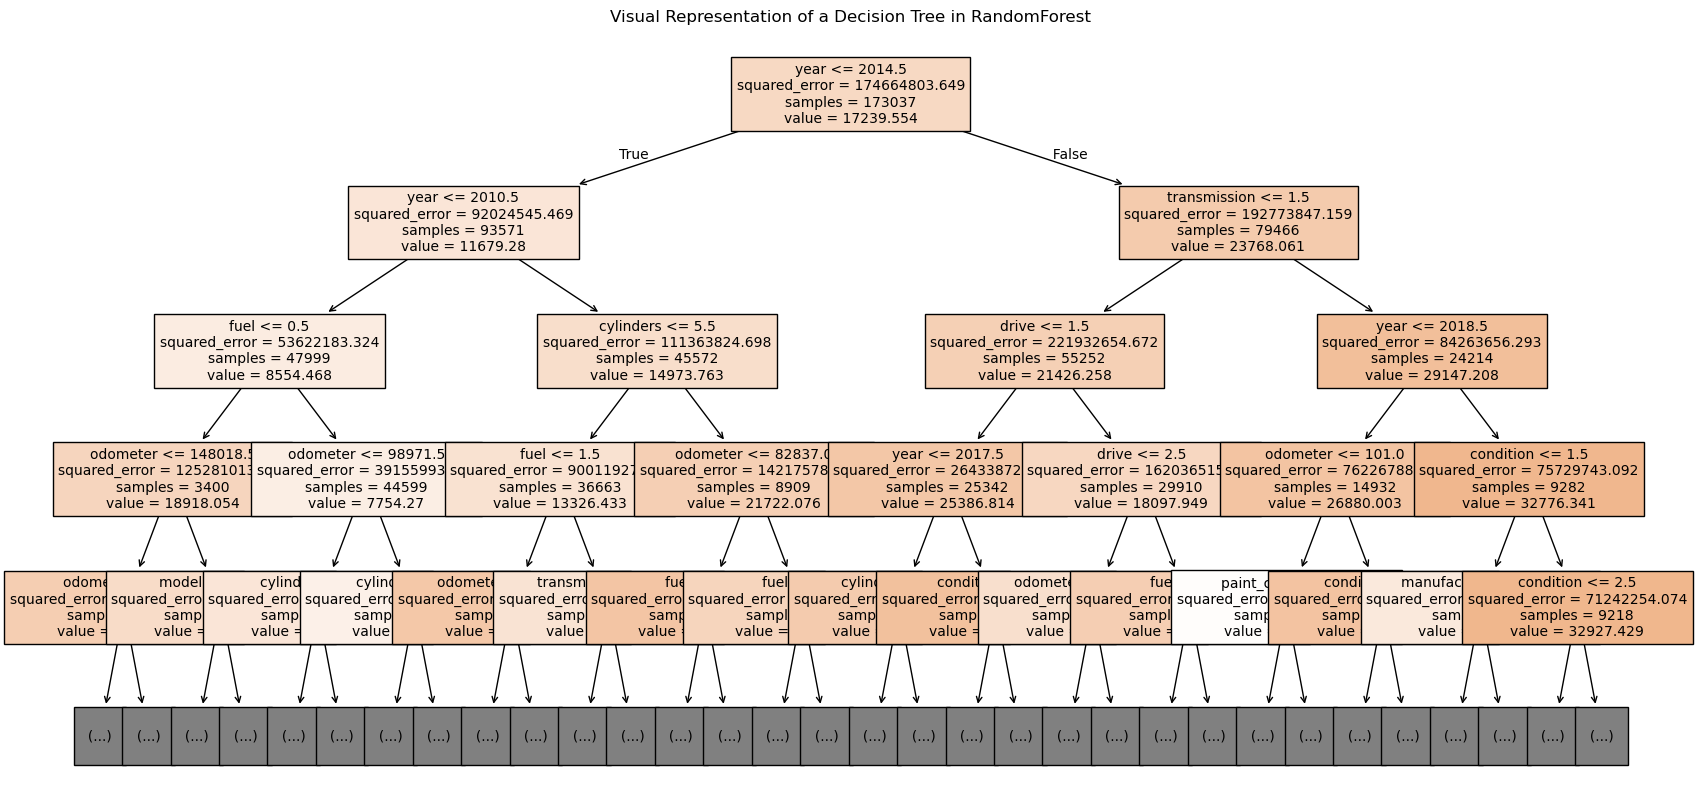

In [128]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)  # Ensure the forest is trained

# Select one of the trees
tree = forest.estimators_[0]

# Set up the plot size
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(tree, filled=True, feature_names=X_train.columns, max_depth=4, fontsize=10)
plt.title('Visual Representation of a Decision Tree in RandomForest')
plt.show()

In [113]:
forest.fit(X_train, y_train)


Features used in training: ['year', 'paint_color', 'type', 'drive', 'title_status', 'fuel', 'cylinders', 'condition', 'model', 'manufacturer', 'transmission', 'state', 'odometer']


In [264]:

#create new data frame to predict car price
new_df = pd.DataFrame({
    'paint_color': ['white'],  
    'type': ['SUV'],
    'drive': ['4wd'],
    'title_status': ['clean'],
    'fuel': ['diesel'],
    'cylinders': ['4 cylinders'],
    'condition': ['new'],
    'model': ['rav4'],
    'manufacturer': ['toyota'],
    'transmission': ['automatic'],
    'state': ['al'],
    'year': [2014],  
    'odometer': [100000]
})

categorical_features = ['paint_color', 'type', 'drive', 'title_status', 
                        'fuel', 'cylinders', 'condition', 'model', 
                        'manufacturer', 'transmission', 'state']
new_df[categorical_features] = ordinal_encoder.transform(new_df[categorical_features])

predicted_price = forest.predict(new_df)
print(f"The predicted price is: ${predicted_price[0]:,.2f}")

The predicted price is: $13,994.30
